In [ ]:
This Portfolio Project is an effort to show how species are distributed amoung national parks with reference to being 
endangered.

The Goal:
    National Parks Service data from codecademy (using fictional but similar datasets) wants to understand the conservation 
    status and the distribution within national parks

Data: 
    Two csvs provided by codecademy species and observations
    
Analysis:
    Distributions, counts, relationships between species, endangered status and observation of species within parks
    
Evaluation:
    Continued goal checking with reflection and conclusion
    

In [ ]:
1. DATA

In [ ]:
#first importing fo all necessary modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

#then make sure I can see the plots in jupyter notebook
%matplotlib inline


In [ ]:
#time to load up the two data files and check the first five lines and the shape
species = pd.read_csv('species_info.csv', encoding='utf-8')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [ ]:
observations = pd.read_csv('observations.csv', encoding='utf-8')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [ ]:
print(f"species shape: {species.shape}")
print(f"observations shape: {observations.shape}")

species shape: (5824, 4)
observations shape: (23296, 3)


In [ ]:
#there are multiple scientific names for species, but I want to see how many unique names and categories there are
print(f"species_count: {species.scientific_name.nunique()}")
print(f"categories: {species.category.nunique()}")
print(f"categories: {species.category.unique()}")


species_count: 5541
categories: 7
categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [ ]:
#check how many species per category type
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [ ]:
#ok now time to cross reference this with conservation status but need to analyze that column first
print(f"num_Conserv_stat: {species.conservation_status.unique()}")
print(f"num_Conserv_stat: {species.conservation_status.nunique()}")

num_Conserv_stat: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
num_Conserv_stat: 4


In [ ]:
print(f"nan_s: {species.conservation_status.isna().sum()}")
print(species.groupby('conservation_status').size())

nan_s: 5633
conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64


In [ ]:
#time to check out the observations csv and the two last columns
print(f"num_park: {observations.park_name.nunique()}")
print(f"num_park: {observations.park_name.unique()}")
print(f"total_obs: {observations.observations.sum()}")

num_park: 4
num_park: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']
total_obs: 3314739


In [ ]:
#look at all that nan not included in the group by listing, change the nan to Not Applicable
species.fillna('Not Applicable', inplace = True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
Not Applicable        5633
Species of Concern     161
Threatened              10
dtype: int64

In [ ]:
2. Analysis

In [ ]:
#conservation_status has four categories, i wonder how animal categories are distributed in those consevatyion status cates.
conservation_species = species[species.conservation_status != "Not Applicable"]\
    .groupby(["conservation_status", "category"])['scientific_name']\
    .count()\
    .unstack()
conservation_species


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


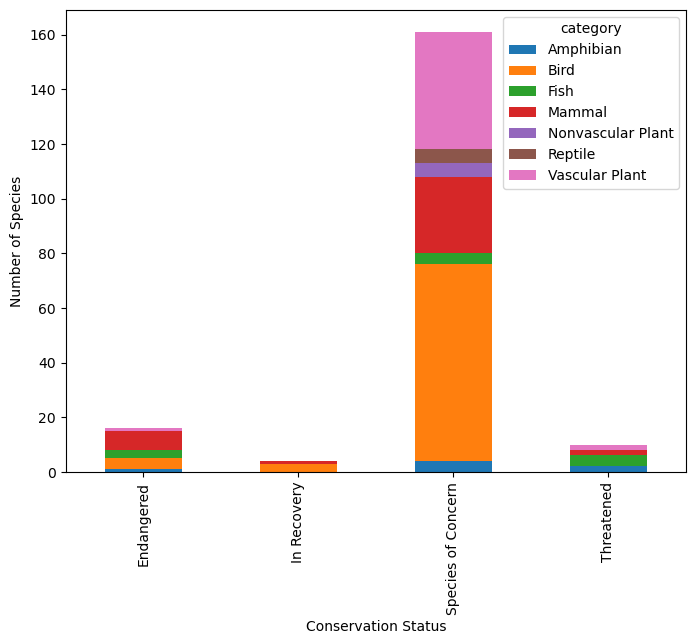

In [ ]:
#Time to visually analyze this, there are multiple species cates in one conservation status so a stacked bar will work
ax = conservation_species.plot(kind = 'bar', figsize=(8,6), 
                               stacked=True)
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

In [ ]:
#so which species is most likely to be endangered? 
#create new column
species['protected'] = species.conservation_status != 'Not Applicable'
endangered_status = species.groupby(['category', 'protected'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='protected', index='category', values='scientific_name')\
    .reset_index()
endangered_status.columns = ['category', 'not_protected', 'protected']
endangered_status
    


,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [ ]:
#now check the rate of protection from each category
endangered_status['percent_protected'] = endangered_status.protected / \
    (endangered_status.protected + endangered_status.not_protected) * 100
endangered_status

,category,not_protected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [ ]:
#stat significance among mammal/bird then mammal/reptile then mammal/amphibian
from scipy.stats import chi2_contingency
contin1 = [[30, 146],[75, 413]]
chi2_contingency(contin1)
 #.69 is way above the 0.05 for stat significance, no relationship here




(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

In [ ]:
contin2=[[30, 146], [5, 73]]
chi2_contingency(contin2)
#p value is below .05 so significant, so mammals sig need more help than reptiles

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

In [ ]:
contin3=[[30, 146], [7, 72]]
chi2_contingency(contin3)
#no sig

(2.321746712946015,
 0.12757669693198975,
 1,
 array([[ 25.5372549, 150.4627451],
        [ 11.4627451,  67.5372549]]))

In [ ]:
#now its time to look at different species of mammals at different parks, list common names without repeats
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_names = species[species.category == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()
common_names[ :6]

cleaned = []
for item in common_names:
    item = list(dict.fromkeys(item))
    cleaned.append(item)
cleaned[:5]


[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk']]

In [ ]:
#make it easier to read by putting all into one list
commonlist = list(chain.from_iterable(i if isinstance(i,list) else [i] for i in cleaned))
commonlist[:5]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison']

In [ ]:
#how many times did each work occur
counted_mammals = []
for i in commonlist:
    x = commonlist.count(i)
    counted_mammals.append((i,x))
pd.DataFrame(set(counted_mammals), columns=['Type', 'Count']).sort_values('Count', ascending = False).head(7)

,Type,Count
107,Bat,23
102,Shrew,18
83,Myotis,17
28,Mouse,16
154,Chipmunk,13
2,American,12
111,Squirrel,12


In [ ]:
#there are 23 types of bats! make a new column for boolean values true or false if it is a bat
species['bat'] = species.common_names.str.contains(r"\bBat\b", regex = True)
species.head(8)

,category,scientific_name,common_names,conservation_status,Protected,protected,bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,Not Applicable,False,False,False
1,Mammal,Bos bison,"American Bison, Bison",Not Applicable,False,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",Not Applicable,False,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",Not Applicable,False,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Applicable,False,False,False
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Not Applicable,False,False,False
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Not Applicable,False,False,False
7,Mammal,Canis latrans,Coyote,Species of Concern,True,True,False


In [ ]:
species[species.bat]

,category,scientific_name,common_names,conservation_status,protected,bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Not Applicable,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Not Applicable,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Not Applicable,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Not Applicable,False,True


In [ ]:
#look at observation of bats in national parks
bat_obs = observations.merge(species[species.bat])
bat_obs

,scientific_name,park_name,observations,category,common_names,conservation_status,protected,bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Not Applicable,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [ ]:
#bats per national park
bat_obs.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [ ]:
#now for protected bats vs not protected per park
obs_park = bat_obs.groupby(['park_name', 'protected']).observations.sum().reset_index()
obs_park

,park_name,protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


<function matplotlib.pyplot.show(close=None, block=None)>

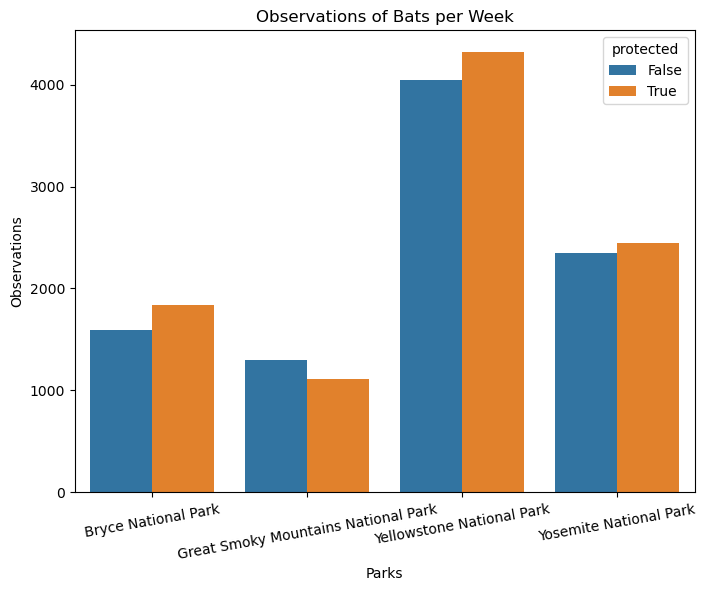

In [ ]:
#plot it up
plt.figure(figsize=(8,6))
sns.barplot (x=obs_park.park_name, y=obs_park.observations, hue=obs_park.protected)
plt.xlabel('Parks')
plt.xticks(rotation=10)
plt.ylabel('Observations')
plt.title('Observations of Bats per Week')
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
plt.show


In [ ]:
#most of the species were not part of this conservation, reflected by the amount of NAN
#Mammals and birds are endangered
#Mammals and reptiles showed the greatest differences in conservation efforts
#bats are the most common among national parks and can be seen more so at yellowstone